In [0]:
#import 
%matplotlib inline
import matplotlib.pyplot as plt 
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
import os
work_dir = "/content/TensorFlow-Tutorials/"
if os.getcwd() != work_dir:
  !git clone https://github.com/Hvass-Labs/TensorFlow-Tutorials
os.chdir(work_dir)

#Load Data
from mnist import MNIST
data = MNIST(data_dir="data/MNIST/")

Cloning into 'TensorFlow-Tutorials'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 477 (delta 1), reused 3 (delta 1), pack-reused 471
Receiving objects: 100% (477/477), 62.81 MiB | 33.26 MiB/s, done.
Resolving deltas: 100% (223/223), done.
- Download progress: 100.0% Done!
- Download progress: 100.0% Done!
- Download progress: 100.0% Done!
- Download progress: 100.0% Done!


In [3]:
print("Size of :")
print("- Training-set:\t\t{}".format(data.num_train))
print("- Validation-set:\t{}".format(data.num_val))
print("- Test-set:\t\t{}".format(data.num_test))


Size of :
- Training-set:		55000
- Validation-set:	5000
- Test-set:		10000


In [0]:
#The images are stored in one-dimensional arrays of this length.
img_size_flat = data.img_size_flat

#Tuple with height and width of images used to reshape arrays.
img_shape = data.img_shape

#Number of classes , one class for each of 10 digits.
num_classes = data.num_classes

In [28]:
data.y_test[0:5,:]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [6]:
data.y_test_cls[0:5]

array([7, 2, 1, 0, 4])

In [0]:
def plot_images(images,cls_true,cls_pred=None):
  assert len(images) == len(cls_true)==9
  
  #create figure with 3*3 sub -plots
  fig,axes = plt.subplots(3,3)
  fig.subplots_adjust(hspace = 0.3 , wspace = 0.3)
  
  for  i , ax in enumerate(axes.flat):
      #plot image
      ax.imshow(images[i].reshape(img_shape),cmap="binary")
      
      #show true and predicted classes.
      if cls_pred is None:
        xlabel = "True : {0}".format(cls_true[i])
      else:
        xlabel = "True : {0},pred : {1}".format(cls_true[i],cls_pred[i])
       
      ax.set_xlabel(xlabel)
      
      #Remove ticks from the plot.
      ax.set_xticks([])
      ax.set_yticks([])
    
   #Ensure that plot is shown correctly
  plt.show()

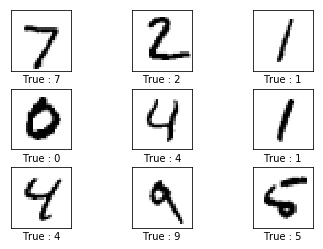

In [8]:
# Get the first images from the test-set.
images = data.x_test[0:9]

# Get the true classes for those images.
cls_true = data.y_test_cls[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

In [0]:
#Placeholder variable
x= tf.placeholder(tf.float32,[None,img_size_flat])

y_true = tf.placeholder(tf.float32,[None , num_classes])

y_true_cls = tf.placeholder(tf.int64,[None])


In [0]:
weights = tf.Variable(tf.zeros([img_size_flat,num_classes]))

biases = tf.Variable(tf.zeros([num_classes]))


In [0]:
logits = tf.matmul(x,weights) + biases

In [0]:
y_pred  = tf.nn.softmax(logits)

In [0]:
y_pred_cls = tf.argmax(y_pred,axis = 1)

In [0]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels = y_true)

In [0]:
cost = tf.reduce_mean(cross_entropy)


In [0]:
#optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.5).minimize(cost)


In [0]:
#Performance measure
correct_prediction = tf.equal(y_pred_cls,y_true_cls)

accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [0]:
#Tensorflow run
#to execute the graph.
session = tf.Session()


In [0]:
session.run(tf.global_variables_initializer())
batch_size = 100

In [0]:
def optimize(num_iterations):
  for i in range(num_iterations):
      #Get a batch of training examples.
      #x_batch now holds a batch of images and 
      #y_true_batch are the true labels of those batch images.
      x_batch ,y_true_batch ,_ = data.random_batch(batch_size= batch_size)
      
      #put the batch into a dict with the proper names
      #for placeholder variables in the Tensorflow graph.
      #Note that the plceholder for y_true_cls is not set #
      #because it is not used during training.
      feed_dict_train = {x:x_batch,
                        y_true : y_true_batch}
      
      #Run the optimizer using this batch of training data .
      #TensorFlow assigns the variables in feed_dict_train
      #to the placeholder variables and then runs the optimizer.
      session.run(optimizer,feed_dict_train)

In [0]:
feed_dict_test = {
      
            x:data.x_test,
    y_true:data.y_test,
    y_true_cls: data.y_test_cls
}

In [0]:
def print_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    
    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))

In [0]:
def print_confusion_matrix():
    #Get the true classification for the test-set.
    cls_true = data.y_test_cls
    
    #Get the predicted classification for the test-set.
    cls_pred = session.run(y_pred_cls,feed_dict = feed_dict_test)
    
    #Get the confusion matrix using sci-kitlearn
    cm = confusion_matrix(y_true=cls_true,
                          y_pred = cls_pred
                         )
    
    #print the confusion matrix as text.
    print(cm)
    
    #plot the confusion matrix as an image.
    plt.imshow(cm,interpolation ='nearest',cmap=plt.cm.Blues)
    
    #Make various adjustments to the plot.
    plt.tigth_layout()
    plt.colorbar()
    tick_marks = np.arrange(num_classes)
    plt.xticks(tick_marks,range(num_classes))
    plt.yticks(tick_marks,range(num_classes))
    plt.xlabel('predicted')
    plt.ylabel('True')
    
    
    plt.show()

In [0]:
def plot_example_errors():
    #Use TensorFlow to get a list of boolean values
    #Whether each test image has been correctly classified,
    #and a list for the predicted class of each image.
    correct , cls_pred = session.run([correct_prediction,y_pred_cls],
                                    feed_dict = feed_dict_test)
    #Negate the boolean array.
    incorrect = ( correct == False)
    
    #Get the images from the test-set that have been
    #incorrectly classified.
    images = data.x_test[incorrect]
    
    #Get the predicted classes for those images .
    cls_pred = cls_pred[incorrect]
    
    #Get the true classes for those images 
    cls_true = data.y_test_cls[incorrect]
    
    #plot the first 9 images 
    plot_images(images=images[0:9],
                cls_true= cls_true[0:9],
                cls_pred=cls_pred[0:9])

In [0]:
def plot_weights():
    #Get the values for the weights from the TensorFlow variable.
    w = session.run(weights)
    
    #Get the lowest and highest values for the weights.
    # This is used to correct the color intensity across the 
    #images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)
    
    #create figure with 384 subplots
    #where the last 2 subplots are unused.
    fig,axes = plt.subplots(3,4)
    fig.subplots_adjust(hspace=0.3,wspace=0.3)
    
    for i ,ax in enumerate(axes.flat):
        #Only use the weights for the first 10 sub-plots.
        if i<10 :
            image = w[:,i].reshape(img_shape)
            
            #Set the label for the sub-plot.
            ax.set_xlabel("weights: {0}".format(i))
            
            #plot the image 
            ax.imshow(image , vmin=W_min,vmax=w_max,cmap='seismic')
         # Remove ticks from each sub plot
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

In [26]:
for i in range(1,28):
  
  optimize(num_iterations =i)
  print_accuracy()

Accuracy on test-set: 17.0%
Accuracy on test-set: 42.8%
Accuracy on test-set: 58.2%
Accuracy on test-set: 79.3%
Accuracy on test-set: 79.7%
Accuracy on test-set: 84.2%
Accuracy on test-set: 86.5%
Accuracy on test-set: 87.5%
Accuracy on test-set: 88.2%
Accuracy on test-set: 88.1%
Accuracy on test-set: 89.0%
Accuracy on test-set: 89.2%
Accuracy on test-set: 89.5%
Accuracy on test-set: 89.8%
Accuracy on test-set: 89.8%
Accuracy on test-set: 89.4%
Accuracy on test-set: 90.3%
Accuracy on test-set: 89.9%
Accuracy on test-set: 90.6%
Accuracy on test-set: 90.9%
Accuracy on test-set: 90.8%
Accuracy on test-set: 90.7%
Accuracy on test-set: 90.9%
Accuracy on test-set: 91.2%
Accuracy on test-set: 91.0%
Accuracy on test-set: 91.0%
Accuracy on test-set: 91.1%


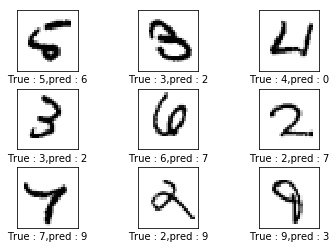

In [27]:
plot_example_errors()